     Height  Weight      Country
0      64.0   144.0        Italy
1      68.0   150.0        Italy
2      66.0   147.0        Italy
3      71.0   170.0        Italy
4      65.0   163.0        Italy
..      ...     ...          ...
235    68.0   152.0  Netherlands
236    73.0   179.0  Netherlands
237    69.0   176.0  Netherlands
238    70.0   164.0  Netherlands
239    68.0   181.0  Netherlands

[240 rows x 3 columns]


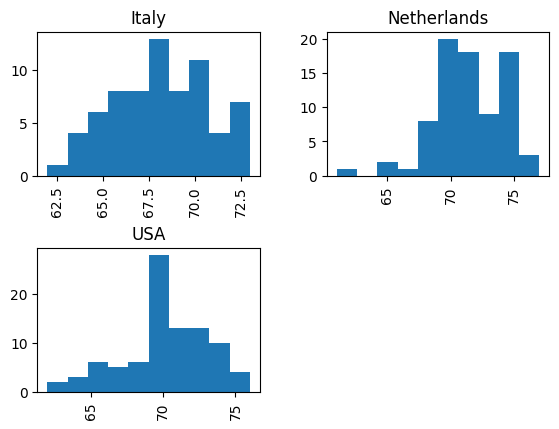

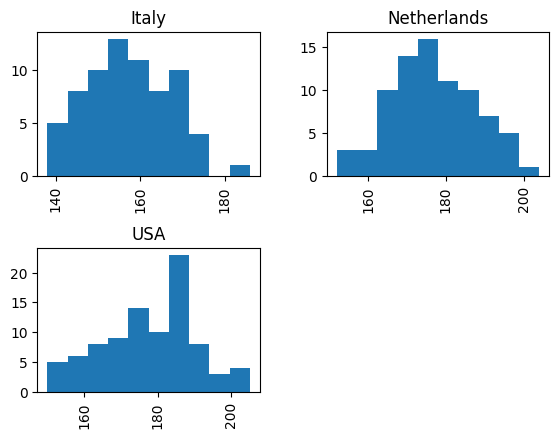

stat, p =  2.657937494045452 0.07218180380373036
ANOVA_test =  F_onewayResult(statistic=73.0316861418844, pvalue=1.9503368513081563e-25)
Ttest_Netherlands_Italy =  Ttest_indResult(statistic=-11.135754716464666, pvalue=2.6541621479997745e-21)
Ttest_Italy_USA =  Ttest_indResult(statistic=-10.715936381667479, pvalue=1.755707616976545e-20)
Ttest_Netherlands_USA =  Ttest_indResult(statistic=0.3920914807972518, pvalue=0.6954875719362548)
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
      Italy Netherlands  19.2839    0.0 14.8586 23.7093   True
      Italy         USA  20.0048    0.0 15.6957 24.3138   True
Netherlands         USA   0.7208 0.9119  -3.434  4.8757  False
--------------------------------------------------------------
Overweight    0   1
Country            
Italy        54  16
Netherlands  48  32
USA          38  52
chi2_contingency = 4.79

In [46]:
#Nedim Hodzic
#Lab 04 : T54-574

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import levene, f_oneway
import scipy.stats as stats 
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from sklearn import linear_model
import seaborn

#Section 1 
df = pd.read_csv('/Users/nedim/Downloads/males_ht_wt_cntry.csv')
#Section 1 Part 2 
print(df)
#Section 1 Part 2 B
df.hist(column='Height',by='Country')
plt.show()
#Section 1 Part 2 C
df.hist(column='Weight',by='Country')
plt.show()

#Section 1 Part 3A: Conduct a test (ANOVA) to determine if the weights differ by nationality and interpret your results. 
#Check whether 3 groups have equal variance.
stat, p = levene(df['Weight'][df['Country']=='Italy'], df['Weight'][df['Country']=='Netherlands'],df['Weight'][df['Country']=='USA'] )
print('stat, p = ', stat, p)
#levene = your null hypothesis is equal variance
# Resulting p value = 0.072. 
# Since 0.072 > 0.05, therefore we do not reject the null hypothesis and can conclude that all weight data from each country has equal variances. 

ANOVA_test = f_oneway(df['Weight'][df['Country']=='Italy'], df['Weight'][df['Country']=='Netherlands'],df['Weight'][df['Country']=='USA'])
print('ANOVA_test = ', ANOVA_test)
#ANOVA = your null hypothesis is that there is no diffence between all the group means (not specific to which group)
#Resulting p value = 1.9503368513081563e-25
# Since the calculated p value < 0.05, we reject our null hypothesis and can conclude that the mean weight by country is NOT equal and there is a difference

#Section 1 Part 4A: Conduct a test to determine if the weights of the Italian males were significantly 
#different than the Dutch males (from the Netherlands) and interpret your results 
Ttest_Netherlands_Italy = stats.ttest_ind(a=df['Weight'][df['Country']=='Italy'], b=df['Weight'][df['Country']=='Netherlands'], equal_var=True)
print('Ttest_Netherlands_Italy = ', Ttest_Netherlands_Italy)
#Pvalue = 2.6541621479997745e-21 , less than 0.05, therefore we reject the null hypothesis
# Therefore we can conclude that the weights of Dutch males were significialy different than the weight of Italian males 

#Section 1 Part 4B: Conduct a test to determine if the weights of the Italian males were significantly 
#different than the USA males and interpret your results 
Ttest_Italy_USA = stats.ttest_ind(a=df['Weight'][df['Country']=='Italy'], b=df['Weight'][df['Country']=='USA'], equal_var=True)
print('Ttest_Italy_USA = ', Ttest_Italy_USA)
#Pvalue = 1.755707616976545e-20 , less than 0.05, therefore we reject the null hypothesis
# Therefore we can conclude that the weights of USA males were significialy different than the weight of Italian males 

#Section 1 Part 4C: Conduct a test to determine if the weights of the American males were significantly 
#different than the Dutch males (from the Netherlands) and interpret your results 
Ttest_Netherlands_USA = stats.ttest_ind(a=df['Weight'][df['Country']=='USA'], b=df['Weight'][df['Country']=='Netherlands'], equal_var=True)
print('Ttest_Netherlands_USA = ', Ttest_Netherlands_USA)
#pvalue=0.6954875719362548, greater than 0.05, therefor we do not reject the null hypothesis
#Therefore we can conclude that the weights of Dutch males were not significantly different to the weight of USA males 

#Section 1 Part 5:
#Conducting multiple tests like this increases the odds of getting false significant results. 
#What is the probability one of these t-tests is not actually significant (i.e. false positive)? 

#Probability of a false positive test is : P(Making at least 1 Type I error in m tests) = 1 - (1 - α)^m
# 1-(1-0.05)^3 = 0.143 = 14.3% 

#Section 1 Part 6:
#When comparing these groups, it’s better to control the FWER. Use a multiple comparison procedure with a Tukey adjustment.
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['Weight'], groups=df['Country'], alpha=0.05)
print(m_comp)

#Section 2 Part 1: 
#Create a new BMI column. Use the Imperial formula BMI = (Weight*703)/(Height^2)  
df['BMI'] = ((df['Weight']*703)/(df['Height']**2))
#df

#Section 2 Part 2: 
#Create another new column ‘Overweight’ that is a 1 if BMI >= 25 and 0 otherwise. 
BMI_filters = [(df.BMI >= 25),(df.BMI <= 25)]
values = [1, 0]
df['Overweight'] = np.select(BMI_filters, values)
#df

#Section 2 Part 3:
#Create a contingency table and examine it. Describe any differences you see between nationalities. 
data_crosstab = pd.crosstab(df['Country'], df['Overweight'], margins = False)
print(data_crosstab)
#The difference visible between nationalities is that the least amount of obesitity is evident in Italy and the most is in the U.S.

#Section 2 Part 4:
#Conduct a test to see if the differences are significant. Explain your findings. 
stat, p, dof, expected = chi2_contingency(data_crosstab)
print("chi2_contingency =", p)

#Section 3 Part 1: 
#Build a linear regression of to see whether height predicts weight. There are two main modules 
#for conducting linear regression in Python. Try both. Explain the results.  
#a. Note: When using sklearn, the predictor variable must be an (n,1) array. 

#Method 1
#Assign variables
x = df['Weight']
y = df['Height'] 
#constant
x = sm.add_constant(x) 
#OLS 
lm = sm.OLS(y,x).fit() 
lm.predict(x)
lm.summary()
#Results of Method 1 - OLS Regression

#coef	std err	t	P>|t|	[0.025	0.975]
#const	48.1221	1.879	25.611	0.000	44.421	51.824
#Weight	0.1274	0.011	11.659	0.000	0.106	0.149
#Dep. Variable:	Height	R-squared:	0.364
#Model:	OLS	Adj. R-squared:	0.361
#Method:	Least Squares	F-statistic:	135.9


# The r-squared - explains 36.4% of the variability in height values.
# t, P>t (p-value): The t scores and p-values are used for hypothesis test. 
# Note: The Weights variable has a statistically significant p-value. 
# Height = B0 = 48.1221
# Weight = B1 = 0.1274

#Method 2
x = df[['Weight']] 
lm = linear_model.LinearRegression()
lm.fit(x, y)
lm.predict(x)
print(lm.score(x,y))

#Section 3 Part 2
#Fit the same regression model using linear algebra. Compare your resultant ’s to the ones you obtained earlier.
#Our formula for solving for a Linear Regression Model is: Y = B0 + B1X + E
#B = (Xt.X)^-1.Xt.Y
X=df["Weight"]
Y=df["Height"]
X=np.vstack((np.array([1]*len(X)), X)).T
Beta=np.matmul(np.linalg.inv(np.matmul(np.transpose(X),X)),np.matmul(np.transpose(X),Y))
print(Beta)
#Result = [48.12211756  0.12738151]
#This equals the same B0 and B1 calculated previously in our regression model in Section 3 Part 1 of the assignment

